<a href="https://colab.research.google.com/github/basanab/mu_e_scatt/blob/main/1te_tm_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math as mt
from array import array
import pandas as pd

#defining a function that generates theta_mu given random theta_e for a given enrgy of initial muon.
def get_theta_spect(mu_E,theta_e):
    p_mu= mu_E # momentum of initial muon in units of GeV/c
    E_e=0.51 * 10**(-3) # energy of initial electron in units of GeV  
    E_mu_p=[] # enrgy of scattered muon
    E_e_p=[] # energy of scattered electron
    p_mu_p= [] #  momentum of scattered muon
    num=[]
    den=[]

    me= 0.511 * 10**(-3) # mass of electron in units of GeV/c^2
    mm= 207* me # mass of muon
    theta_m= []
    size=len(theta_e)
    y=[]  
    arr= np.zeros((size,4))
    a= 0
    b= size
    
    for t2 in theta_e:
        
        nr=(mu_E+me)**2 + (mu_E**2 - mm**2)* (mt.cos(t2)*mt.cos(t2))
        dr=(mu_E+me)**2 -  (mu_E**2 - mm**2)* (mt.cos(t2)*mt.cos(t2) )
        num.append(nr)
        den.append(dr)
        E_e_p.append(me*nr/dr)

        E_mu_p.append(mu_E+ E_e -(me*nr/dr)) #
        p_mu_p.append( np.sqrt(((mu_E + E_e-(me*nr/dr))**2)-(mm**2)))
        #print(t2)

    for j in range(len(theta_e)):
        y.append((E_mu_p[j]*(mu_E+me)-(mu_E*me)-mm**2)/(p_mu*p_mu_p[j])) 
    
        #print(y)
        theta_m.append( mt.acos(y[j]))
    
    
    arr[a:b,0]= theta_e    
    arr[a:b,1]= theta_m
    arr[a:b,2]= E_mu_p
    arr[a:b,3]= E_e_p
       
    df= pd.DataFrame(arr, columns=['Theta_e', 'Theta_mu', 'Emu_p', 'Ee_p'])
    
    # print(arr)
    return(df)

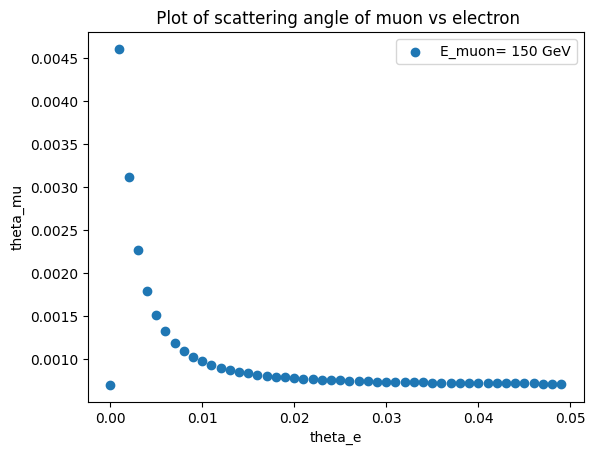

In [ ]:
t_e= np.arange(0,0.05,0.001)
mu_E=150
check_df=get_theta_spect(mu_E,t_e)
# check_df
plt.scatter(check_df["Theta_e"],check_df['Theta_mu'],label='E_muon= {} GeV'.format(mu_E))
plt.title(" Plot of scattering angle of muon vs electron")
plt.xlabel("theta_e")
plt.ylabel("theta_mu")
plt.legend(loc="best")
plt.show()

In [8]:
#This will create array of same no. repeated len(t_e) times
muon_energy= np.full(len(t_e), mu_E)
# muon_energy
mu_energy= pd.DataFrame(muon_energy,columns=["E_mu"])


In [12]:
data= pd.concat([mu_energy,check_df],axis=1)
# data
data.to_csv('check_datasheet.csv', header=True, index=False, sep='\t', mode='a')
